## Regressão Múltipla
 _Prática da aula sobre  **regressão múltipla** em um dataset referente a **características de carros**, que foi usado para analisar o preço dos carros, com base no que foi visto em aula_

Dataset:

In [ ]:
import pandas as pd 

df = pd.read_excel('cars.xls') # abrindo o arquivo excel

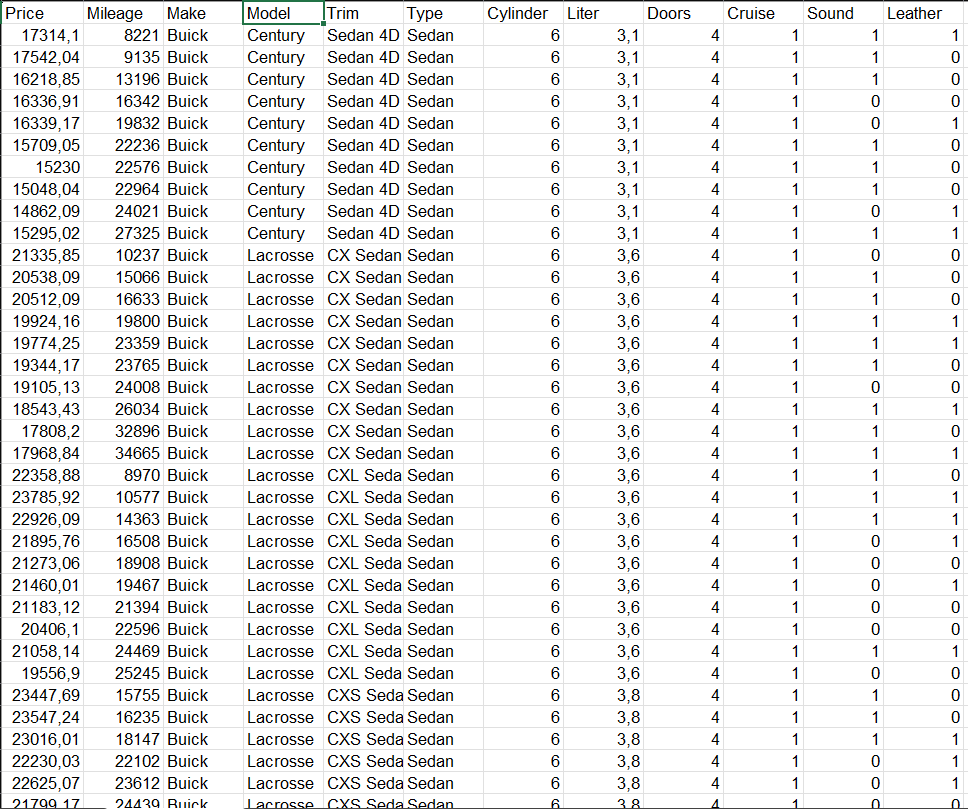

Utilizando numpy e pandas para comparar milhas com preço.

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


C:\Users\cainh\AppData\Local\Temp\ipykernel_56208\1708353336.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()


<Axes: xlabel='Mileage'>

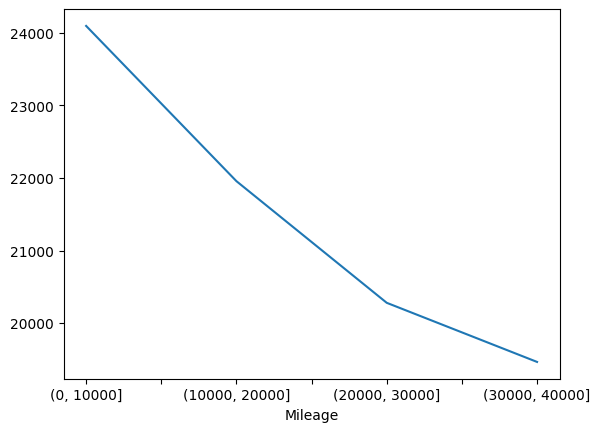

In [ ]:
%matplotlib inline
import numpy as np 

df1 = df[['Mileage','Price']] # selecionando as colunas de interesse
bins = np.arange(0, 50000, 10000) # criando os bins de 0 a 50000 com intervalo de 10000
groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean() # agrupando os dados pela coluna 'Mileage' e calculando a média dos preços

print(groups.head()) # imprimindo os primeiros 5 grupos
groups['Price'].plot.line() # plotando o gráfico de linha com os preços médios por intervalo de quilometragem

Utilizando Numpy, Pandas, standard scaler e statsmodels, para separar as features (Variáveis independentes) e a variável alvo, preço. Com esses dados, é adicionado uma constante para o modelo ser treinado, onde é exibido seu desempenho.

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = df[['Mileage', 'Cylinder', 'Doors']] # features
y = df['Price'] # Dado de interesse

x[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(x[['Mileage', 'Cylinder', 'Doors']]) # Normalizando os dados

x = sm.add_constant(x) # Adicionando a constante para o modelo de regressão

print(x.head()) # Adicionando a constante para o modelo de regressão

est = sm.OLS(y, x).fit() # Estimando o modelo de regressão
print(est.summary()) # Resumo do modelo de regressão

   const   Mileage  Cylinder     Doors
0    1.0 -1.417485   0.52741  0.556279
1    1.0 -1.305902   0.52741  0.556279
2    1.0 -0.810128   0.52741  0.556279
3    1.0 -0.426058   0.52741  0.556279
4    1.0  0.000008   0.52741  0.556279
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           3.95e-77
Time:                        19:28:08   Log-Likelihood:                -8356.7
No. Observations:                 804   AIC:                         1.672e+04
Df Residuals:                     800   BIC:                         1.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                  

C:\Users\cainh\AppData\Local\Temp\ipykernel_56208\2382193972.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(x[['Mileage', 'Cylinder', 'Doors']])


Média de preços em relação a rodagem

In [ ]:
y.groupby(df.Mileage).mean() # Agrupando os dados pela coluna 'Mileage' e calculando a média dos preços

Mileage
266      10813.343521
583      70755.466717
636      25948.962594
788      48310.329545
865      16116.843916
             ...     
41566    15792.831437
41829    32537.186751
42691    52001.994379
48991    28777.959695
50387    22244.876553
Name: Price, Length: 791, dtype: float64

*Realizando testes com o modelo para análise*

In [13]:
scaled = scale.transform([[45000, 6 , 2]]) # Normalizando os dados de entrada
scaled = np.insert(scaled[0], 0, 1) # Adicionando a constante para o modelo de regressão
print(scaled) # Imprimindo os dados normalizados
predicted = est.predict(scaled) # Fazendo a previsão com o modelo de regressão
print(predicted) # Imprimindo o preço previsto

[ 1.          3.07256589  0.52741047 -1.7976593 ]
[22905.57445949]


c:\Users\cainh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
scaled = scale.transform([[19000, 6 , 2]]) # Normalizando os dados de entrada
scaled = np.insert(scaled[0], 0, 1) # Adicionando a constante para o modelo de regressão
print(scaled) # Imprimindo os dados normalizados
predicted = est.predict(scaled) # Fazendo a previsão com o modelo de regressão
print(predicted) # Imprimindo o preço previsto

[ 1.         -0.10156411  0.52741047 -1.7976593 ]
[26944.1509348]


c:\Users\cainh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
scaled = scale.transform([[1900, 6, 2]]) # Normalizando os dados de entrada
scaled = np.insert(scaled[0], 0, 1) # Adicionando a constante para o modelo de regressão
print(scaled) # Imprimindo os dados normalizados
predicted = est.predict(scaled) # Fazendo a previsão com o modelo de regressão
print(predicted) # Imprimindo o preço previsto

[ 1.         -2.189165    0.52741047 -1.7976593 ]
[29600.29161665]


c:\Users\cainh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
scaled = scale.transform([[4500, 8 , 10]]) # Normalizando os dados de entrada
scaled = np.insert(scaled[0], 0, 1) # Adicionando a constante para o modelo de regressão
print(scaled) # Imprimindo os dados normalizados
predicted = est.predict(scaled) # Fazendo a previsão com o modelo de regressão
print(predicted) # Imprimindo o preço previsto

[ 1.         -1.871752    1.96971667  7.61809363]
[24030.33526838]


c:\Users\cainh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
scaled = scale.transform([[4500, 8 , 2]]) # Normalizando os dados de entrada
scaled = np.insert(scaled[0], 0, 1) # Adicionando a constante para o modelo de regressão
print(scaled) # Imprimindo os dados normalizados
predicted = est.predict(scaled) # Fazendo a previsão com o modelo de regressão
print(predicted) # Imprimindo o preço previsto

[ 1.         -1.871752    1.96971667 -1.7976593 ]
[37255.24368759]


c:\Users\cainh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
scaled = scale.transform([[4500, 8 , 2]]) # Normalizando os dados de entrada
scaled = np.insert(scaled[0], 0, 1) # Adicionando a constante para o modelo de regressão
print(scaled) # Imprimindo os dados normalizados
predicted = est.predict(scaled) # Fazendo a previsão com o modelo de regressão
print(predicted) # Imprimindo o preço previsto

[ 1.         -1.871752    1.96971667 -1.7976593 ]
[37255.24368759]


c:\Users\cainh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
scaled = scale.transform([[4500, 8 , 20]]) # Normalizando os dados de entrada
scaled = np.insert(scaled[0], 0, 1) # Adicionando a constante para o modelo de regressão
print(scaled) # Imprimindo os dados normalizados
predicted = est.predict(scaled) # Fazendo a previsão com o modelo de regressão
print(predicted) # Imprimindo o preço previsto

[ 1.         -1.871752    1.96971667 19.38778479]
[7499.19974438]


c:\Users\cainh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
scaled = scale.transform([[4500, 8 , 1]]) # Normalizando os dados de entrada
scaled = np.insert(scaled[0], 0, 1) # Adicionando a constante para o modelo de regressão
print(scaled) # Imprimindo os dados normalizados
predicted = est.predict(scaled) # Fazendo a previsão com o modelo de regressão
print(predicted) # Imprimindo o preço previsto

[ 1.         -1.871752    1.96971667 -2.97462841]
[38908.35723999]


c:\Users\cainh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


É possível notar que, o modelo concluiu que o número de portas é inversamente proporcional ao preço do veículo, assim como o tempo de uso.